[link]()

In [7]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [8]:
X_digits, Y_digits = load_digits(return_X_y=True)
X_digits, Y_digits

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

In [14]:
# normaliserar datan
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits, test_size=0.5)

scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)
log = LogisticRegression(max_iter=10000)

knn.fit(scaled_X_train, Y_train)
log.fit(scaled_X_train, Y_train)

Y_knn = knn.predict(scaled_X_test)
Y_log = log.predict(scaled_X_test)

print(classification_report(Y_test, Y_knn))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99        89
           1       0.93      1.00      0.96        93
           2       1.00      0.98      0.99        91
           3       0.98      0.95      0.96        94
           4       1.00      0.97      0.98        87
           5       0.99      0.98      0.98        88
           6       1.00      0.98      0.99        96
           7       0.95      0.99      0.97        80
           8       0.96      0.94      0.95        93
           9       0.94      0.97      0.96        88

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



In [15]:
print(classification_report(Y_test, Y_log))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        89
           1       0.90      0.96      0.93        93
           2       1.00      0.97      0.98        91
           3       1.00      0.91      0.96        94
           4       0.97      0.95      0.96        87
           5       0.93      0.98      0.96        88
           6       0.99      0.97      0.98        96
           7       0.98      0.99      0.98        80
           8       0.88      0.90      0.89        93
           9       0.91      0.94      0.93        88

    accuracy                           0.95       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.95      0.95       899



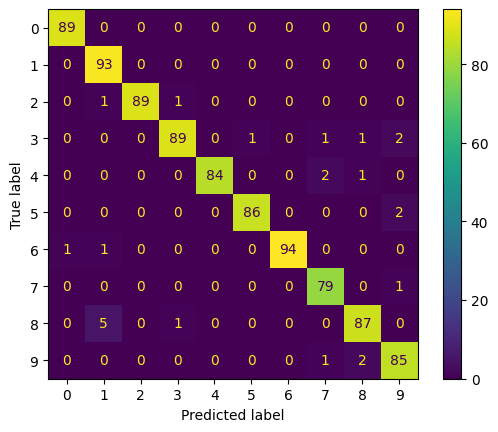

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(Y_test, Y_knn)
ConfusionMatrixDisplay(cm).plot()

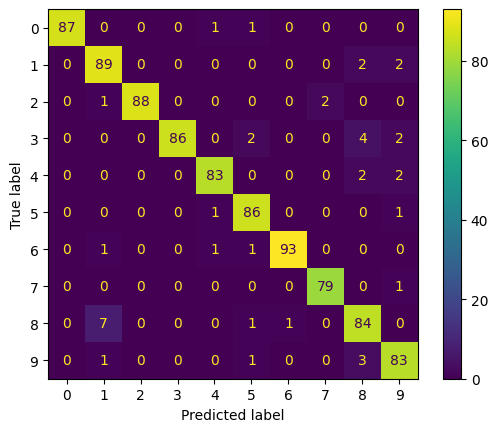

In [18]:
cm = confusion_matrix(Y_test, Y_log)
ConfusionMatrixDisplay(cm).plot()

Raphael gör detta med logistic regression med crossvalidation.


In [ ]:
# hyperparmetrisering av K (antalet neighbours)
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

error = 1 - accuracy_score(Y_test, Y_knn)
error_list = list()

for k in range(1, 50):
    model_KNN = KNeighborsClassifier(n_neighbors=k)
    model_KNN.fit(scaled_X_test)
    Y_hat = model_KNN.predict(scaled_X_test)
    error_list += [1-accuracy_score(Y_test, Y_hat)]

fig, ax = plt.figure(), plt.